# RESIDUAL ANALYSIS
Residual=Y_ACTUAL-Y_PREDICTED

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:

california=fetch_california_housing()
df=pd.DataFrame(california.data,columns=california.feature_names)
df['Price']=california.target

# Features and target
X = df.drop('Price',axis=1)
y= df['Price']

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [37]:
c = model.intercept_
m = model.coef_[0]
 
print(f"Equation of the line : y={m:.2f}x+{c:.2f}")

Equation of the line : y=0.45x+-37.02


In [38]:
y_pred = model.predict(X_test)

# Step-2 calculate Residuals

In [40]:
#Residuals
residual=y_test-y_pred
#display
print('\nFirst 5 Rediduals:')
print(pd.DataFrame({'Actual':y_test[:5],'Predicted':y_pred[:5],'Residual':residual[:5]}))


First 5 Rediduals:
        Actual  Predicted  Residual
20046  0.47700   0.719123 -0.242123
3024   0.45800   1.764017 -1.306017
15663  5.00001   2.709659  2.290351
20484  2.18600   2.838926 -0.652926
9814   2.78000   2.604657  0.175343


# Residual Plots

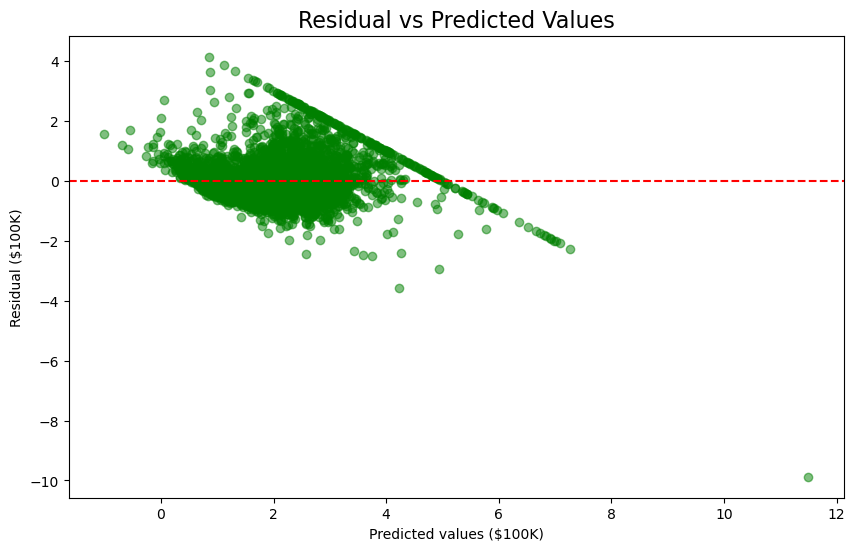

In [44]:
#PLot:Scatter Plot of Residuals
plt.figure(figsize=(10,6))
plt.scatter(y_pred,residual,color='green',alpha=0.5)
plt.axhline(y=0,color='red',linestyle='--')
plt.title('Residual vs Predicted Values',fontsize=16)
plt.xlabel('Predicted values ($100K)')
plt.ylabel('Residual ($100K)')
plt.show()

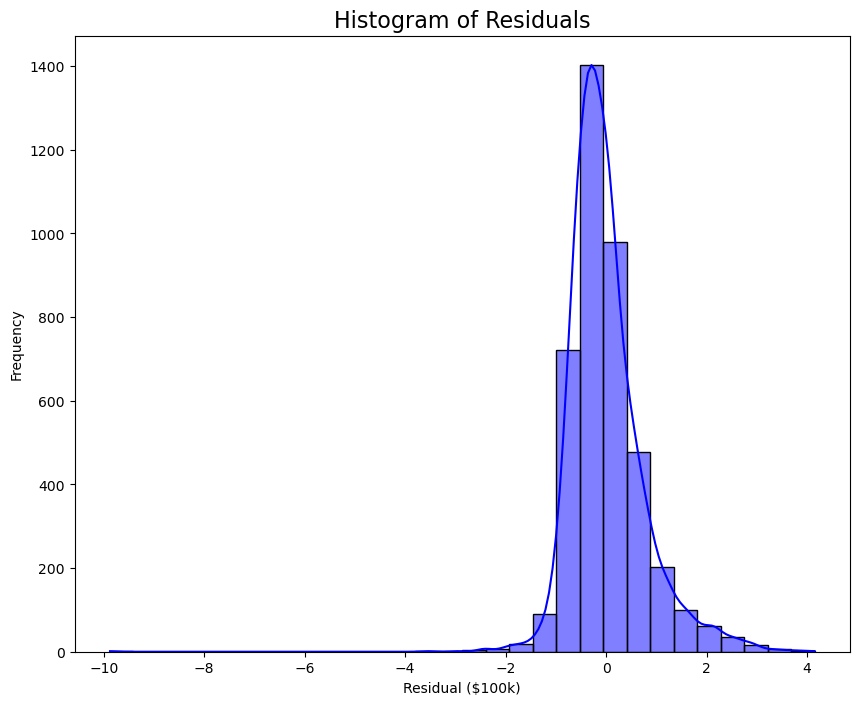

In [52]:
#Plot:Histogram of Residuals
plt.figure(figsize=(10,8))
sns.histplot(residual,bins=30,kde=True,color='blue')
plt.title('Histogram of Residuals',fontsize=16)
plt.xlabel('Residual ($100k)')
plt.ylabel('Frequency')
plt.show()

# Q-Q Plot of Residuals

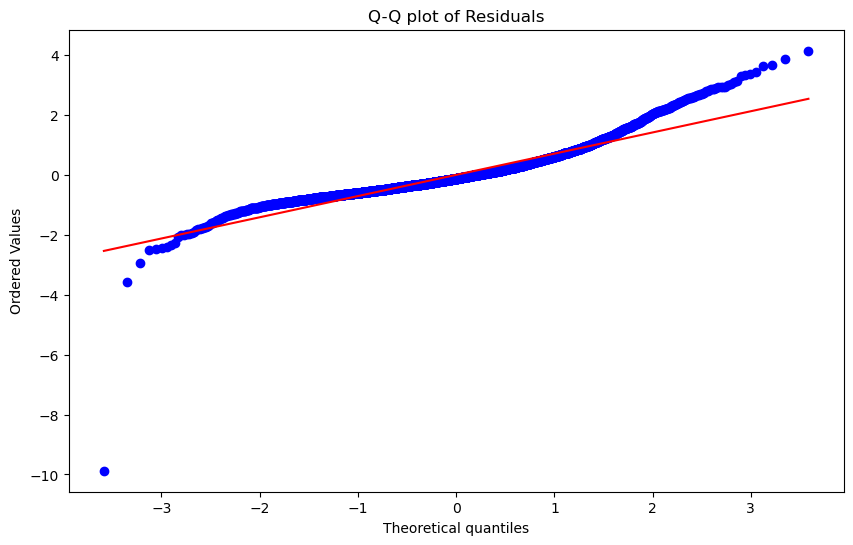

In [54]:
    import scipy.stats as st
    plt.figure(figsize=(10,6))
    st.probplot(residual,dist='norm',plot=plt)
    plt.title('Q-Q plot of Residuals')
    plt.show()

# What to Look For:in Q-Q polt
    
    Good: Points follow the red line (normal).
        
    Bad: Big deviations, especially at ends.
        
Our Case: Mostly linear, but tails curve off—non-normal extremes (capping effect).

# Step 4: Interpret Residual Analysis
**Linearity**: Scatter plot shows no strong curve—assumption holds decently.
    
**Constant Variance**: Slight fanning at higher prices—mild heteroscedasticity (variance grows).
    
**Normality**: Histogram and Q-Q show approximate normality, but tails suggest outliers or capping ($500K limit skews residuals).
    
**Takeaway**: Model's okay but not perfect—capping and non-constant variance could be issues.